In [3]:
source("../common-ffpe-snvf/R/eval.R")
library(ggplot2)
library(scales)
library(dplyr)
library(patchwork)

Warning message in file(filename, "r", encoding = encoding):
“cannot open file '../common-ffpe-snvf/R/eval.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [1]:
get_ct_count <- function(ffpe_annot, ff_annot, dataset_id, match_id_col, sample_id_col = "sample_name") {
	
	ct_count <- list()

	for (i in seq_len(nrow(ffpe_annot))){
		
		sample_number <- ffpe_annot[i, match_id_col]
		ffpe_sample_name <- ffpe_annot[i, sample_id_col]

		message(sprintf("processing %s. %s", i, ffpe_sample_name))

		matched_ff_annot <- ff_annot[ff_annot[[match_id_col]] == sample_number, ]
		ff_sample_name <- matched_ff_annot[[sample_id_col]]
		
		ffpe_snv <- read_vcf(file.path(vcf_dir, ffpe_sample_name, sprintf("%s.vcf", ffpe_sample_name)), columns = c("chrom", "pos", "ref", "alt"))
		# Filter C:G>T:A variants
		ffpe_snv_ct <- ct_filter(ffpe_snv)

		ff_snv <- read_vcf(file.path(vcf_dir, ff_sample_name, sprintf("%s.vcf", ff_sample_name)), columns = c("chrom", "pos", "ref", "alt"))
		# Filter C:G>T:A variants
		ff_snv_ct <- ct_filter(ff_snv)

		## Count C>T variants
		n_ct_ffpe <- nrow(ffpe_snv_ct)
		n_ct_ff <- nrow(ff_snv_ct)

		sample_ct_count <- data.frame(
			ffpe_sample_name = ffpe_sample_name,
			matched_ff_sample_name = ff_sample_name,
			n_ct_ffpe = n_ct_ffpe,
			n_ct_ff = n_ct_ff
		)

		ct_count[[i]] <- sample_ct_count

	}

	all_ct_count <- do.call(rbind, ct_count)
	## Wide to Long
	ct_count_long <- reshape(all_ct_count, idvar = c("ffpe_sample_name", "matched_ff_sample_name"), direction = "long", v.names = "n_ct", varying = c("n_ct_ffpe", "n_ct_ff"), timevar = "sample_type", times = c("FFPE", "Fresh Frozen"))
	row.names(ct_count_long) <- NULL
	ct_count_long$dataset_id <- dataset_id

	ct_count_long
}


In [21]:
make_bar_chart <- function(df){
	ggplot(data = df, aes(x = ffpe_sample_name, y = n_ct, fill = sample_type)) +
	facet_wrap(~dataset_id, scales = "free") +
	geom_bar(stat="identity", position=position_dodge()) +
	scale_y_continuous(labels = label_number()) +
	labs(
		x = "Samples", 
		y = "C>T Mutation Count",
		# fill = "Sample Type",
		# title = "C:G>T:A SNV Count"
	) +
	# theme_minimal() +
	theme(
		plot.title = element_text(hjust = 0.5, face = "bold", size = 12, margin = margin(t = 10, b = 10)),
		plot.subtitle = element_text(hjust = 0.5),
		plot.caption = element_text(hjust = 0),
		legend.position = "bottom",
		legend.title = element_blank(), # element_text(size = 10)
		legend.text = element_text(size = 8),
		legend.key.size = unit(0.5, "cm"),
		axis.text.x = element_blank(),
		axis.ticks.x = element_blank(),
		panel.background = element_rect(fill = "white", color = NA)
		# axis.title.x = element_text(size = 10),
		# axis.title.y = element_text(size = 10),
		
	)
}

In [8]:
## Dataset specific variables
dataset_id <- "SRP044740"
vcf_dir <- "../vcf/SRP044740/vcf_filtered_pass_orientation"
lookup_table <- read.delim("../annot/SRP044740/sample-info_stage1.tsv")
ffpe_annot <- lookup_table[lookup_table$sample_type == "FFPE", ]
ff_annot <- lookup_table[lookup_table$sample_type == "FROZ", ]
sample_id_col <- "sample_name"
match_id_col <- "sample_number"

In [ ]:
srp_ct_count <- get_ct_count(ffpe_annot, ff_annot, "ENA SRP044740", match_id_col = "sample_number", sample_id_col = "sample_name")
qwrite(srp_ct_count, "SRP044740/SRP044740_ct_count.tsv")
srp_ct_plot <- make_bar_chart(srp_ct_count)

processing 1. BGI-FFPE1_SRR1523243



processing 2. BGI-FFPE1_SRR1523257

processing 3. BGI-FFPE1_SRR1523263

processing 4. BGI-FFPE2_SRR1523244

processing 5. BGI-FFPE2_SRR1523264

processing 6. BGI-FFPE3_SRR1523251

processing 7. BGI-FFPE3_SRR1523269

processing 8. BGI-FFPE4_SRR1523253

processing 9. BGI-FFPE4_SRR1523268

processing 10. BGI-FFPE5_SRR1523252

processing 11. BGI-FFPE5_SRR1523261

processing 12. BGI-FFPE6_SRR1523256

processing 13. BGI-FFPE6_SRR1523254

processing 14. BGI-FFPE7_SRR1523247

processing 15. BGI-FFPE7_SRR1523266

processing 16. BGI-FFPE8_SRR1523245

processing 17. BGI-FFPE8_SRR1523262

processing 18. BGI-FFPE9_SRR1523255

processing 19. BGI-FFPE10_SRR1523246

processing 20. BGI-FFPE10_SRR1523260

processing 21. BGI-FFPE10_SRR1523265

processing 22. BGI-FFPE11_SRR1523258

processing 23. BGI-FFPE11_SRR1523250

processing 24. BGI-FFPE12_SRR1523248

processing 25. BGI-FFPE12_SRR1523259

processing 26. BGI-FFPE13_SRR1523267

processing 27. BGI-FFPE13_SRR1523249



In [10]:
## Dataset specific variables
dataset <- "PRJEB8754"
vcf_dir <- "../vcf/PRJEB8754/vcf_pass-orient-pos-sb_ad_filtered"
lookup_table <- read.delim("../annot/PRJEB8754/sample-info_matched-ff-ffpe_on-pat-id-sample-type.tsv")
ffpe_annot <- lookup_table[lookup_table$preservation == "FFPE", ]
ff_annot <- lookup_table[lookup_table$preservation == "Frozen", ]
sample_id_col <- "sample_name"
match_id_col <- "inferred_id"

In [11]:
betge_ct_count <- get_ct_count(ffpe_annot, ff_annot, "Betge et al., 2015", match_id_col, sample_id_col)
qwrite(srp_ct_count, "PRJEB8754/PRJEB8754_ct_count.tsv")
betge_ct_plot <- make_bar_chart(betge_ct_count)

processing 1. Pat01_Meta_FFPE_ERR791893

processing 2. Pat03_Meta_FFPE_ERR791895

processing 3. Pat04_Meta_FFPE_ERR791896

processing 4. Pat08_Meta_FFPE_ERR791901

processing 5. Pat09_Meta_FFPE_ERR791902

processing 6. Pat10_Meta_FFPE_ERR791903

processing 7. Pat11_Meta_FFPE_ERR791905



processing 8. Pat12_Meta_FFPE_ERR791907

processing 9. Pat13_Meta_FFPE_ERR791908

processing 10. Pat14_Meta_FFPE_ERR791909



In [12]:
all_dset_ct_count <- rbind(srp_ct_count, betge_ct_count)

sample_counts <- all_dset_ct_count |>
	group_by(dataset_id) |>
	summarise(n_samples = n_distinct(ffpe_sample_name))

sample_counts

dataset_id,n_samples
<chr>,<int>
"Betge et al., 2015",10
SRP044740,27


In [ ]:
w= 8; h = 3
options(repr.plot.width = w, repr.plot.height = h)

sample_counts <- all_dset_ct_count |>
	group_by(dataset_id) |>
	summarise(n_samples = n_distinct(ffpe_sample_name))

final_plot <- betge_ct_plot + srp_ct_plot + 
	plot_layout(
			widths = sample_counts$n_samples, # Set widths proportional to sample count
			guides = "collect", # Collect legends into one common legend
			axis_titles = "collect" 
	) +
	plot_annotation(
		title = "C:G>T:A SNV Count",
		theme = theme(
			plot.title = element_text(hjust = 0.5, face = "bold", size = 12),
			plot.caption = element_text(hjust = 0.5, size = 11), # Center the 'Samples' label
			legend.position = "bottom",
			legend.title = element_blank()
		)
	)

qdraw(final_plot, "ffpe_ff-ct-bar_chart.pdf", width = w, height =  h)

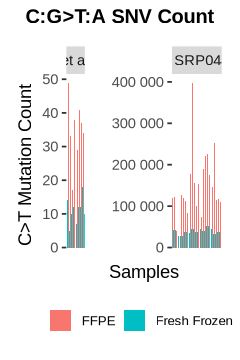

In [ ]:
options(repr.plot.width = w, repr.plot.height = h)
final_plot